In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Importing all the libraries that we would be using**

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [ ]:
##import loan.csv file
d=pd.read_csv('/content/drive/Shared drives/OPIM 5512 - Python Project/cleaned_loan_new.csv', low_memory=False)


In [ ]:
df = d.copy(deep=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,TARGET,emp_length_0,emp_length_1,emp_length_10,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_MidWest,region_NorthEast,region_SouthEast,region_SouthWest,region_West
0,27050,0,10.99,55000.0,22.87,0,31,14,0,36638,61.2,1,17031.10,0.0,0.0,0,0,0,0,114834,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,9750,0,13.98,26000.0,25.12,0,31,12,0,7967,52.8,0,6039.04,0.0,0.0,0,0,0,0,14123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12000,0,6.62,105000.0,14.05,1,43,12,0,13168,21.6,1,7733.38,0.0,0.0,0,0,0,0,267646,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,12000,0,13.53,40000.0,16.94,0,53,7,2,5572,68.8,1,11999.99,0.0,0.0,0,0,0,15386,13605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15000,0,8.90,63000.0,16.51,0,34,8,0,11431,74.2,1,9550.73,0.0,0.0,0,0,0,1514,272492,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Working on a copy of the dataframe so that I do not have to re-read the entire dataset again in order to save memory**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788290 entries, 0 to 788289
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   788290 non-null  int64  
 1   term                        788290 non-null  int64  
 2   int_rate                    788290 non-null  float64
 3   annual_inc                  788290 non-null  float64
 4   dti                         788290 non-null  float64
 5   inq_last_6mths              788290 non-null  int64  
 6   mths_since_last_delinq      788290 non-null  int64  
 7   open_acc                    788290 non-null  int64  
 8   pub_rec                     788290 non-null  int64  
 9   revol_bal                   788290 non-null  int64  
 10  revol_util                  788290 non-null  float64
 11  initial_list_status         788290 non-null  int64  
 12  total_rec_prncp             788290 non-null  float64
 13  total_rec_late

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['TARGET']
X = df.drop('TARGET',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

AUC estimate: 0.869
Mean accuracy score: 0.87
[[198202  27260]
 [  3581   7444]]
Weighted F1 Score: 0.9


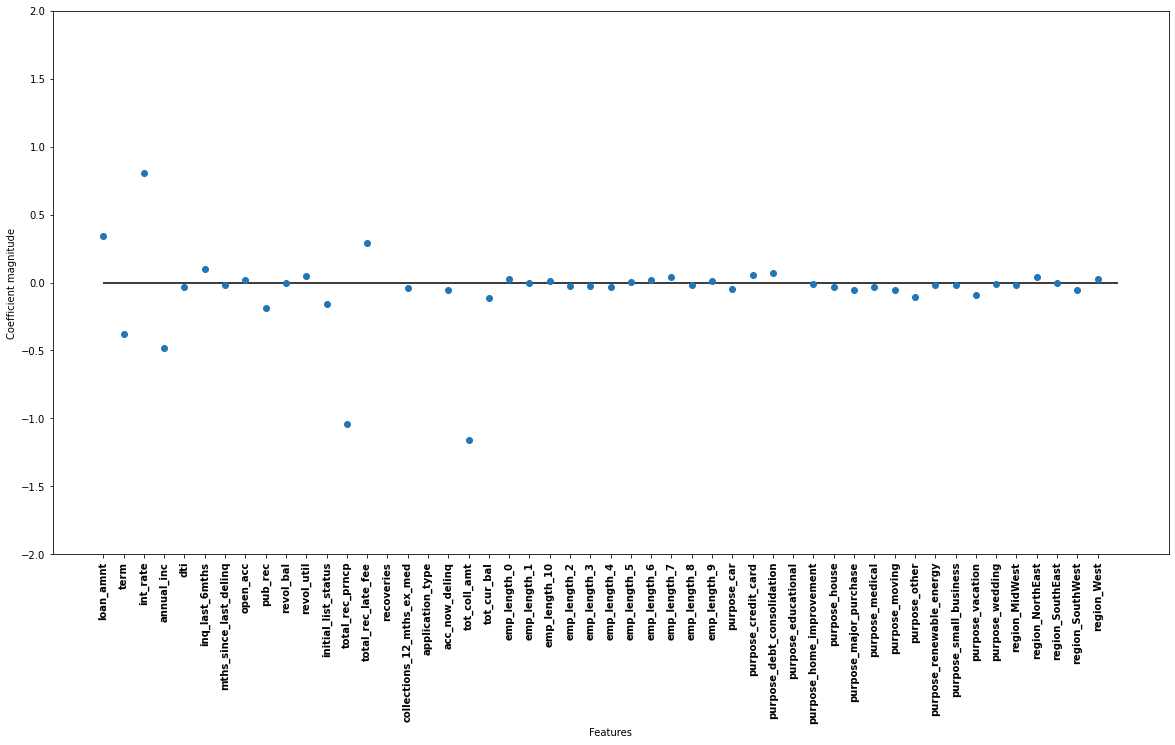

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


log_reg = LogisticRegression(C = 1000,random_state=42)
log_reg.fit(x_train_r, y_train_r)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(log_reg.coef_.T, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontweight='bold')
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")

# generate evaluation metrics

probs = log_reg.predict_proba(X_test)
predicted = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc_lr = round(roc_auc_score(y_test, probs[:, 1]),3)
f1_score_lr = f1_score(y_test, predicted, average = 'weighted')
print(f'AUC estimate: {auc_lr:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(confusion_matrix(y_test, predicted))
print(f'Weighted F1 Score: {f1_score_lr:.3}')

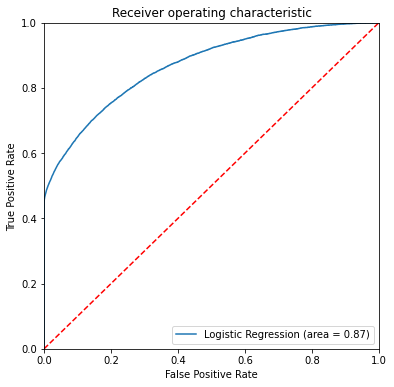

In [ ]:
# ROC curve

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train_r, y_train_r)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
probs = clf.predict_proba(X_test)
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc_clf = round(roc_auc_score(y_test, probs[:, 1]),3)
f1_score_clf = f1_score(y_test, predicted, average = 'weighted')

# generate evaluation metrics
print(f'AUC estimate: {auc_clf:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(confusion_matrix(y_test, predicted))
print(f'Weighted F1 Score: {f1_score_clf:.3}')

AUC estimate: 0.769
Mean accuracy score: 0.939
[[215542   9920]
 [  4614   6411]]
Weighted F1 Score: 0.944


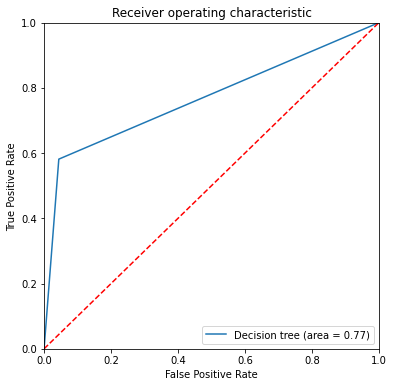

In [ ]:
# ROC curve

fpr_clf, tpr_clf, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr_clf, tpr_clf, label='Decision tree (area = %0.2f)' % auc_clf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=3, max_features='log2', oob_score=True,  random_state=42)
rf.fit(x_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# generate evaluation metrics

probs = rf.predict_proba(X_test)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc_rf = round(roc_auc_score(y_test, probs[:, 1]),3)
f1_score_rf = f1_score(y_test, predicted, average = 'weighted')

print(f'AUC estimate: {auc_rf:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(confusion_matrix(y_test, predicted))
print(f'Weighted F1 Score: {f1_score_rf:.3}')

AUC estimate: 0.852
Out-of-bag score estimate: 0.821
Mean accuracy score: 0.845
[[192373  33089]
 [  3572   7453]]
Weighted F1 Score: 0.884


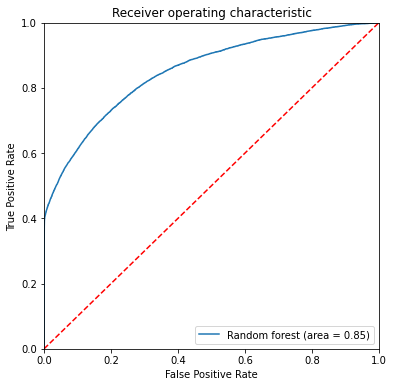

In [ ]:
# ROC curve

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label='Random forest (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

In [ ]:
importance=rf.feature_importances_
indices = np.argsort(importance)[::-1]
feat_labels = X.columns[1:]

# Slide 50: Printing out features
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importance[indices[f]]))

 1) collections_12_mths_ex_med     0.263633
 2) annual_inc                     0.155706
 3) total_rec_late_fee             0.149044
 4) mths_since_last_delinq         0.096987
 5) total_rec_prncp                0.091794
 6) recoveries                     0.050161
 7) dti                            0.038418
 8) revol_bal                      0.036051
 9) emp_length_0                   0.016991
10) inq_last_6mths                 0.015512
11) int_rate                       0.014721
12) initial_list_status            0.013615
13) pub_rec                        0.011114
14) revol_util                     0.008420
15) tot_cur_bal                    0.007196
16) purpose_debt_consolidation     0.006821
17) term                           0.006747
18) open_acc                       0.006159
19) purpose_educational            0.005405
20) region_SouthWest               0.001155
21) emp_length_2                   0.000949
22) purpose_vacation               0.000771


IndexError: ignored

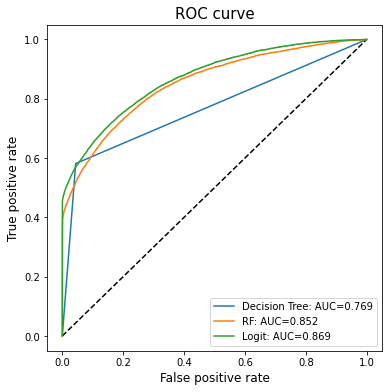

In [ ]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_clf, tpr_clf, label='Decision Tree: AUC='+str(auc_clf));
plt.plot(fpr_rf, tpr_rf, label=('RF: AUC='+ str(auc_rf)));
plt.plot(fpr_lr, tpr_lr, label='Logit: AUC='+str(auc_lr));
plt.xlabel('False positive rate',fontsize='12')
plt.ylabel('True positive rate',fontsize='12')
plt.title('ROC curve', fontsize='15')
plt.legend(loc='best')
plt.savefig('ROC.png', dpi=500)

In [ ]:
df_reg.head()